In [5]:
from sympy import *
import scipy
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimSun'

In [2]:
l_1=0.37
l_2=0.29
d=0.006
m_1=195.90426*l_1*d**2
m_2=0.04
k=4.16928e9*d**4/l_1**3
g=9.8

In [3]:
t=symbols('t')
xi=Function('\\xi')(t)
phi=Function('\\phi')(t)
eta=Function('\\eta')(t)

In [4]:
z=-(l_2**2-xi**2-eta**2)**0.5
x=l_1*cos(phi)+xi
y=l_1*sin(phi)+eta
xdot=diff(x,t)
ydot=diff(y,t)
zdot=diff(z,t)

In [5]:
E_k_2=m_2*(xdot**2+ydot**2+zdot**2)/2
E_p_1=0.5*k*l_1**2*sin(phi)**2
E_k_1=0.5*m_1*l_1**2*cos(phi)**2*Derivative(phi,t)**2
E_p_2=m_2*g*l_2+m_2*g*z

In [6]:
L=E_k_1+E_k_2-E_p_1-E_p_2

In [7]:
f_1=Eq(diff(diff(L,Derivative(phi)),t)-diff(L,phi),0)
f_2=Eq(diff(diff(L,Derivative(xi)),t)-diff(L,xi),0)
f_3=Eq(diff(diff(L,Derivative(eta)),t)-diff(L,eta),0)

In [8]:
eq=(
    f_1,
    f_2,
    f_3
)

In [9]:
import numpy as np

In [49]:
x1=symbols('\eta(0)')
y1=res4[0]*x1**4+res4[1]*x1**3+res4[2]*x1**2+res4[3]*x1**1+res4[4]
text=latex(y1)
text

'1785714285.7142 \\eta(0)^{4} - 65873015.8730142 \\eta(0)^{3} + 895039.682539672 \\eta(0)^{2} - 6295.23809523807 \\eta(0) + 42.4642857142857'

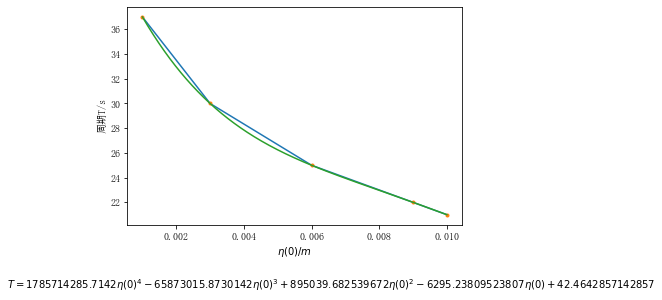

In [63]:
a=[0.001,0.003,0.006,0.009,0.010]
b=[37,30,25,22,21]
plt.plot(a,b)
plt.plot(a,b,'.')
plt.plot(x,y)
plt.ylabel('周期T/s')
plt.xlabel('$\eta(0)/m$')
plt.text(-0.003,15,'$T='+text+'$')
plt.show()

In [23]:
from scipy import log
from scipy.optimize import curve_fit
def func(x, a, b):
    y = a * log(x) + b
    return y

def polyfit(x, y, degree):
    results = {}
    #coeffs = numpy.polyfit(x, y, degree)
    popt, pcov = scipy.optimize.curve_fit(func, x, y)
    results['polynomial'] = popt

    # r-squared
    yhat = func(x ,popt[0] ,popt[1] )                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot

    return results

res=polyfit(a,b,2)
c=res['polynomial'][0]
d=res['polynomial'][1]
x=np.linspace(0.001,0.010,1000)
y=c*np.log(x)+d

In [39]:
res4=np.polyfit(a,b,4)
x=np.linspace(0.001,0.010,1000)
y=res4[0]*x**4+res4[1]*x**3+res4[2]*x**2+res4[3]*x**1+res4[4]
res4

array([ 1.78571429e+09, -6.58730159e+07,  8.95039683e+05, -6.29523810e+03,
        4.24642857e+01])